In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 


In [2]:
games_prediction = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games_prediction

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,False,False,True,False,False
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,True,13.99,13.99,0.000000,True,1,1,1,0,0,0,0,0,0,False,False,False,False,True
40524,True,2.99,2.99,0.000000,False,1,1,0,0,0,0,0,0,0,False,False,False,False,True
40598,True,14.99,14.99,0.000000,False,0,0,0,0,0,0,1,0,0,False,True,False,False,False
40611,True,7.99,7.99,0.000000,False,0,1,0,0,0,0,0,0,0,False,False,False,False,True


# Data Resampling

## Balanced Resampling

In [3]:
from imblearn.combine import SMOTETomek
# Set random_state for reproducibility
smt = SMOTETomek(random_state=20)

X = games_prediction.drop('recommend', axis = 1)
y = games_prediction['recommend']

X_prediction_balanced, y_prediction_balanced = smt.fit_resample(X, y)


# Combine the X and y to a single DF and rename column
games_prediction_balanced = pd.concat([X_prediction_balanced, y_prediction_balanced], axis=1)
games_prediction_balanced.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False,True
3,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False,True
4,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,False,False,True,False,False,True


In [4]:
games_prediction_balanced['recommend'].value_counts()


True     7472
False    7472
Name: recommend, dtype: int64

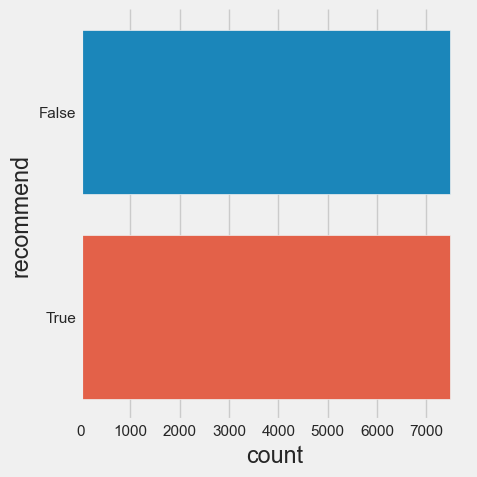

In [5]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'recommend', data = games_prediction_balanced, kind = "count")

In [6]:
games_prediction_balanced.to_csv('datasets/games-prediction-balanced-resampling.csv')



## Oversampling

In [7]:
# Import essential Oversampling module
from imblearn.over_sampling import RandomOverSampler

In [8]:
# Define oversampling strategy (creates 5:4 ratio)
over_smp = RandomOverSampler(sampling_strategy=0.8, random_state=20)

# Define X and y
X = games_prediction.drop('recommend', axis = 1)
y = games_prediction['recommend']

# Fit and apply the transform
X_oversampled, y_oversampled = over_smp.fit_resample(X, y)

In [9]:
print("Good vs Bad Games Proportion (After oversampling)")
print(y_oversampled.value_counts()[1], ':', y_oversampled.value_counts()[0])

Good vs Bad Games Proportion (After oversampling)
7550 : 6040


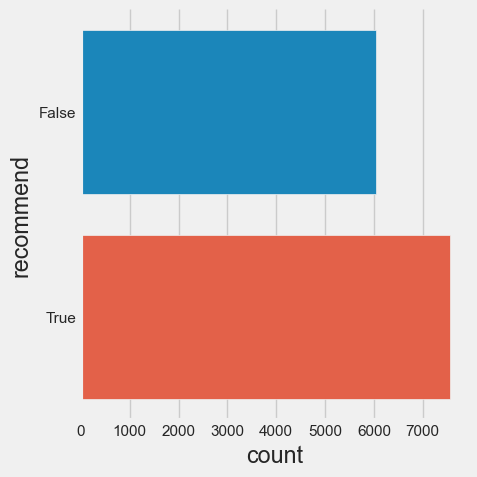

In [10]:
# Combine the two classes back after upsampling
games_prediction_oversampling = pd.concat([X_oversampled, pd.DataFrame(y_oversampled)], axis = 1)
 
# Quick plot to check the balanced classes visually
sb.catplot(y = 'recommend', data = games_prediction_oversampling, kind = "count")

In [11]:
games_prediction_oversampling.to_csv('datasets/games-prediction-over-resampling.csv')

## Visualization of resampled data

In [12]:
games_balanced_resampled = pd.read_csv('datasets/games-prediction-balanced-resampling.csv',index_col= 0)
games_over_resampled = pd.read_csv('datasets/games-prediction-over-resampling.csv',index_col= 0)
games_original_ratio = pd.read_csv('datasets/games-prediction-resampling.csv',index_col=0)



Text(0.5, 0, 'Recommend - Balanced sampled')

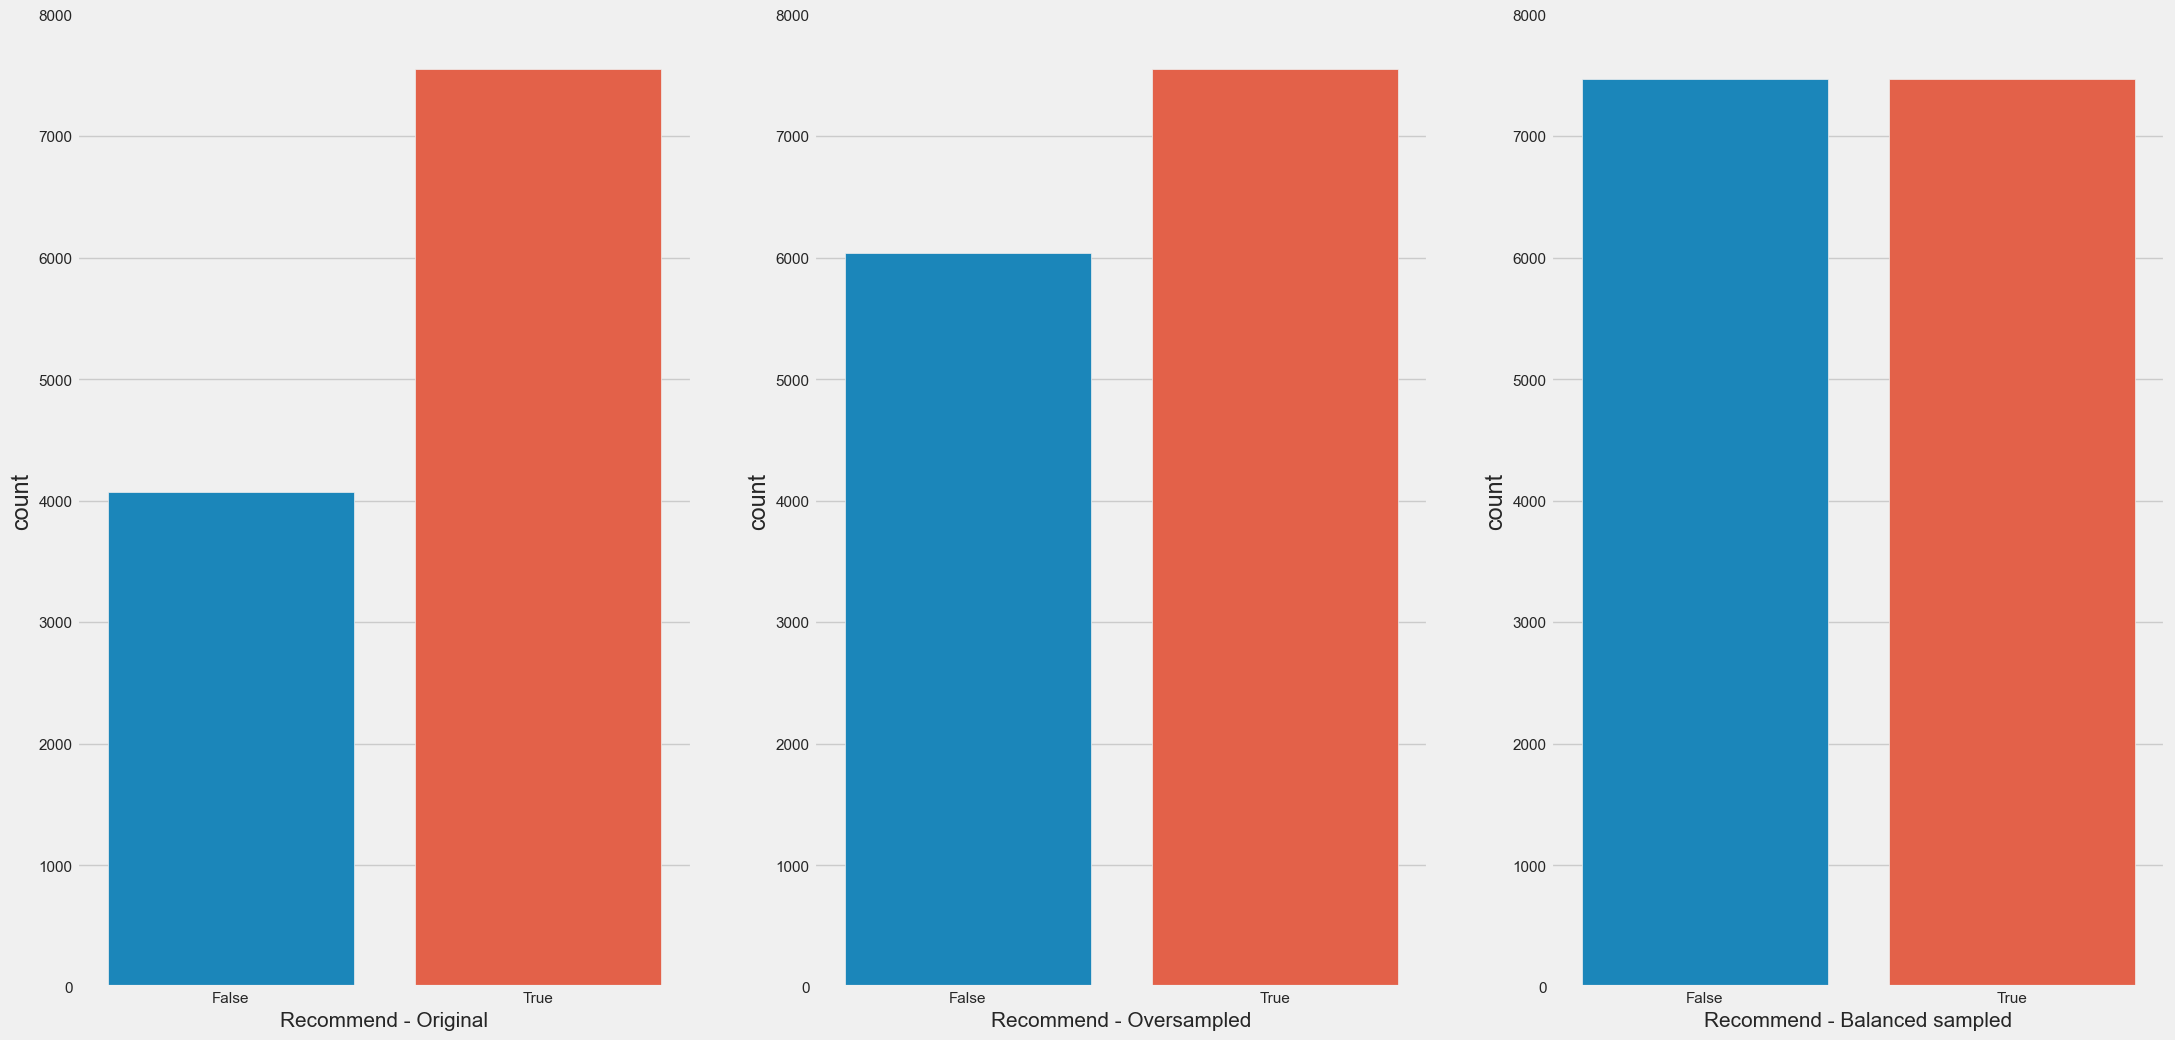

In [13]:
fig, axes =plt.subplots(1,3,figsize=(24,12))
plt.setp(axes,ylim=(0,8000))

sb.countplot(x=games_original_ratio['recommend'], ax=axes[0])
ax = axes[0]
ax.set_xlabel("Recommend - Original",fontsize=15)

sb.countplot(x=games_over_resampled['recommend'], ax=axes[1])
ax = axes[1]
ax.set_xlabel("Recommend - Oversampled",fontsize=15)

sb.countplot(x=games_balanced_resampled['recommend'], ax=axes[2])
ax = axes[2]
ax.set_xlabel("Recommend - Balanced sampled",fontsize=15)


